### AutoMPG 선형회귀 과제

- 팀정보
  - 팀번호: 09팀
  - 참여팀원명:
  - 불참팀원명:


- Dataset: AutoMPG dataset
  - 정답값: mpg
  - 특징: origion을 제외한 6개의 특징들
    - ['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year']
- Train : Test = 7 : 3

(1) Data  정제: 누락된 특징은 그 특징의 평균값으로 대체하라.    
(2) 각 특징들과 mpg(정답값)사이의 상관계수를 구하고, Seaborn(SNS) 히트맵을 그려라.

(3) 상관계수가 가장 높은 순서로 특징을 $x_1, x_2, ..., x_6$이라고 할 때,
특징1개(x1)만을 사용해서 선형회귀를 한 $R^2$ score  $S_1$을 구하라.
특징2개(x1, x2)를 사용해서 선형회귀를 한 $R^2$ score   $S_2$을 구하라.
이런 식으로 특징 6개를 사용한 s6를  구하라.
가로축은 특징의 개수, 세로축은 $S_1, ..., S_6$인 그래프를 그려라.

(4) 특징을 6개 사용한 경우에 대해 Test dataset에 대해  정답값과 예측치간의 MSE를 구하기

- $MSE = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2$

여기에서 $y_i$와 $\hat{y}_i$는 각각 정답값과 예측치를 의미함

(5) 특징을 6개 사용한 경우 $x$축은 정답값($y_i$), $y$축은 예측치($\hat{y}_i$)인 그래프를 그려라.측치( y^i )인 그래프를 그려라.

In [5]:
# 평균값으로 누락된 특징이 정제된 AutoMPG dataset
import pathlib
import matplotlib.pyplot as plt
import pandas as pd

dataset_path='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
mpg_df=pd.read_csv(dataset_path,names=column_names, na_values='?',comment='\t', sep=' ',skipinitialspace=True)

mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
mpg_df.count()

,0
MPG,398
Cylinders,398
Displacement,398
Horsepower,392
Weight,398
Acceleration,398
Model Year,398
Origin,398


#### (1) Data 정제하기

In [7]:
missing_index = mpg_df['Horsepower'].isna()
print("1: Missing index")
print(missing_index[30:35])
mpg_df[missing_index]

1: Missing index
30    False
31    False
32     True
33    False
34    False
Name: Horsepower, dtype: bool


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [8]:
print("2: 평균으로 누락된 항목을 대체하기")
print("mpg_df['Horsepower'].mean() = ", mpg_df['Horsepower'].mean())
mpg_df.fillna(mpg_df['Horsepower'].mean(), inplace=True)
mpg_df[missing_index]
# origin을 삭제하기
mpg_df.drop('Origin', axis=1, inplace=True)

2: 평균으로 누락된 항목을 대체하기
mpg_df['Horsepower'].mean() =  104.46938775510205


#### (2) 각 특징들과 mpg(정답값)사이의 상관계수를 구하고, Seaborn(SNS) 히트맵을 그려라.

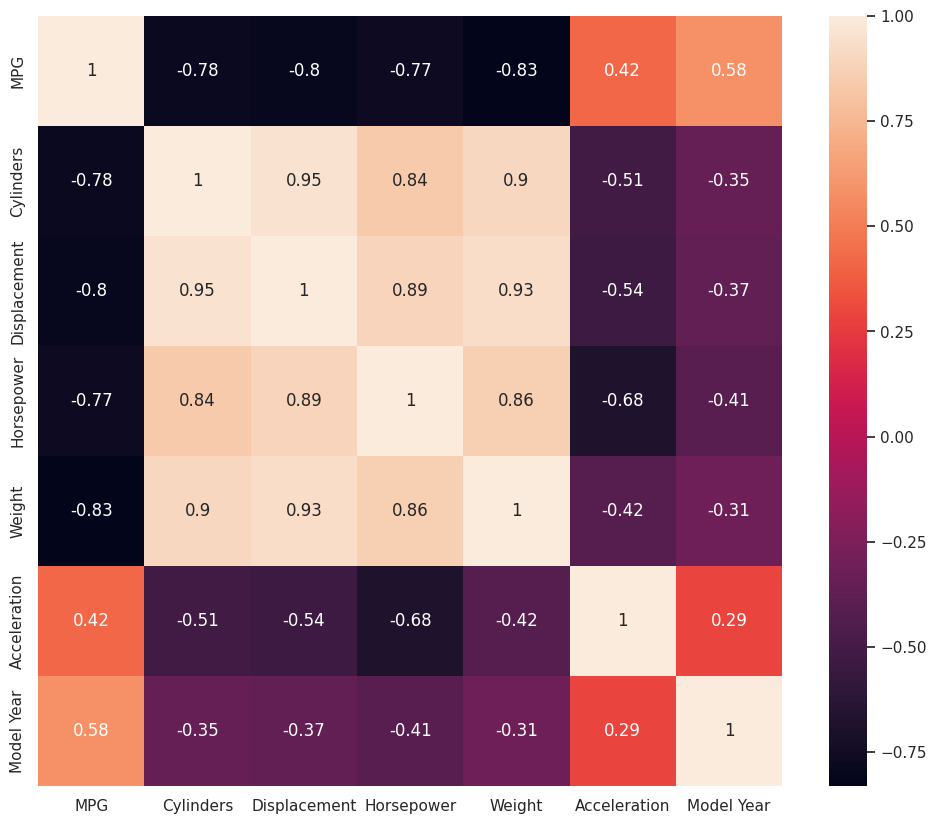

In [9]:
import seaborn as sns # 시각화: Seaborn 라이브러리

sns.set(rc ={'figure.figsize' : (12, 10)}) #상관행렬 가시
correlation_matrix = mpg_df.corr().round(2) #상관행렬 생성
sns.heatmap(data = correlation_matrix, annot = True)


plt.show()

#### (3) 상관계수가 가장 높은 순서로 특징을 x1, x2, ..., x6이라고 할 때,
특징1개(x1)만을 사용해서 선형회귀를 한 R2 score  S1을 구하라.
특징2개(x1, x2)를 사용해서 선형회귀를 한 R2 score   S2을 구하라.
이런 식으로 특징 6개를 사용한 s6를  구하라.
가로축은 특징의 개수, 세로축은 S1, ..., s6인 그래프를 그려라.

Weight          0.83
Displacement    0.80
Cylinders       0.78
Horsepower      0.77
Model Year      0.58
Acceleration    0.42
Name: MPG, dtype: float64


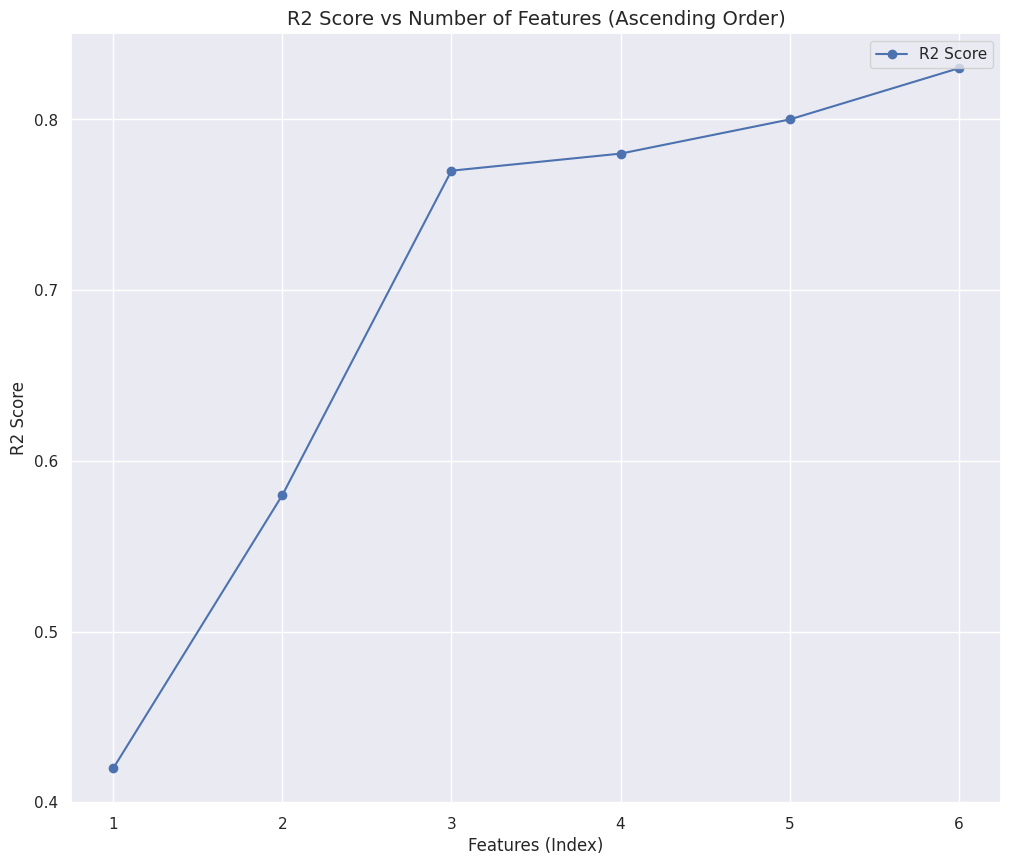

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# correlation_matrix : 상관계수 행렬
# MPG열을 선택해 해당 열의 모든 변수와 상관계수를 가져옴
# .abs()는 상관계수의 절댓값을 계산
# .sort_values(ascending = False) : 상관계수 절댓값을 내림차순으로 정렬. 큰 변수가 위로
# [1:] : 정렬된 결과에서 첫번째 요소(자신과의 상관계수가 1.0)를 제외
correlation_with_mpg = correlation_matrix['MPG'].abs().sort_values(ascending=False)
print(correlation_with_mpg[1:])

# correlation_with_mpg를 사용하여 데이터를 정렬
correlation_with_mpg_sorted = correlation_with_mpg[1:].sort_values()  # 오름차순 정렬

# 그래프 그리기
plt.plot(range(1, len(correlation_with_mpg_sorted) + 1), correlation_with_mpg_sorted.values, marker='o', linestyle='-', label="R2 Score")

# 제목 및 레이블 추가
plt.title("R2 Score vs Number of Features (Ascending Order)", fontsize=14)
plt.xlabel("Features (Index)", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.grid(True)

# x축 라벨 1, 2, 3, 4, 5, 6로 설정
plt.xticks(range(1, len(correlation_with_mpg_sorted) + 1), range(1, len(correlation_with_mpg_sorted) + 1))

plt.legend()

# 그래프 표시
plt.show()

  (1) $R^2$ score를 설명하라.  (ipynb 파일내에서 text(or markdown)로 설명함)
  
  설명을 적을 것

#### (4) 특징을 6개 사용한 경우에 대해 Test dataset에 대해  정답값과 예측치간의 MSE를 구하기
train_test_split의 random_state는 42로 하라.


In [ ]:
mpg_df.columns[6]

'Model\xa0Year'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_y_data = mpg_df['MPG']
df_x_data = mpg_df.drop('MPG',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x_data, df_y_data, random_state = 42, train_size=0.7)

linear_reg = LinearRegression().fit(X_train, y_train)
y_test_pred = linear_reg.predict(X_test)
print('MSE = ', mean_squared_error(y_test, y_test_pred))

MSE =  9.989386125577958


#### (5) 특징을 6개 사용한 경우 x축은 정답값, y축은 예측치인 그래프를 그려라.

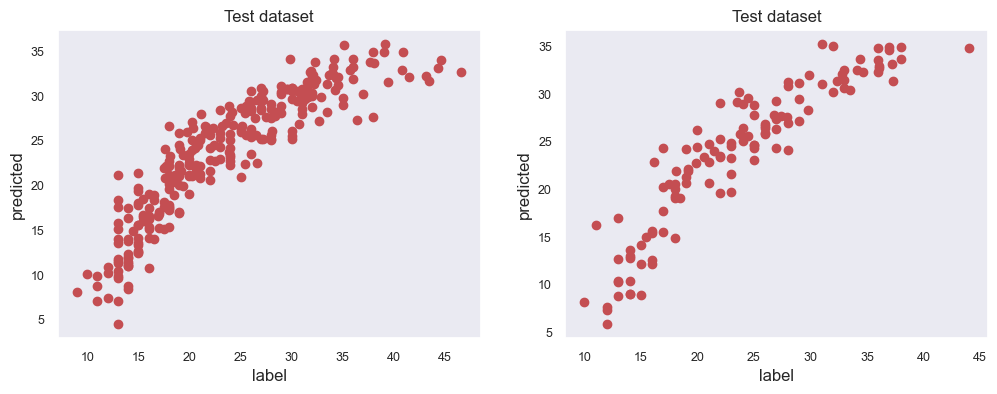

In [ ]:
import matplotlib.pyplot as plt

